In [139]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# Load training data set from CSV file
training_data_df = pd.read_csv("./data/sales_data_training.csv")

In [141]:
# Load testing data set from CSV file
test_data_df = pd.read_csv("./data/sales_data_test.csv")

In [142]:
print(training_data_df.describe().transpose())

                     count        mean           std       min       25%  \
critic_rating       1000.0       3.660      0.834024      2.00      3.00   
is_action           1000.0       0.466      0.499092      0.00      0.00   
is_exclusive_to_us  1000.0       0.267      0.442614      0.00      0.00   
is_portable         1000.0       0.243      0.429110      0.00      0.00   
is_role_playing     1000.0       0.347      0.476254      0.00      0.00   
is_sequel           1000.0       0.746      0.435515      0.00      0.00   
is_sports           1000.0       0.187      0.390107      0.00      0.00   
suitable_for_kids   1000.0       0.270      0.444182      0.00      0.00   
total_earnings      1000.0  110705.229  44970.558163  31355.00  78830.25   
unit_price          1000.0      54.170      8.036927     39.99     49.99   

                          50%        75%        max  
critic_rating            3.75       4.50       5.00  
is_action                0.00       1.00       1.00  
i

In [143]:
# Data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well.
scaler = MinMaxScaler(feature_range=(0,1))

In [144]:
# Scale both the training inputs and outputs
scaled_training = scaler.fit_transform(training_data_df) #output
scaled_testing = scaler.transform(test_data_df) #transform based training data's min/max
print(scaled_training[:,8])

[ 0.37471396  0.19242528  0.11485185  0.14245208  0.48068243  0.13972015
  0.11338792  0.44906748  0.06127428  0.2066801   0.47775457  0.13232657
  0.17925362  0.16335742  0.23946692  0.31206817  0.22852812  0.29274505
  0.34805641  0.42799209  0.22483133  0.12802351  0.40164507  0.29634203
  0.24860908  0.2892331   0.06283433  0.29536607  0.26932589  0.10460805
  0.46514852  0.28864901  0.17730171  0.19321639  0.24883459  0.41745254
  0.27342563  0.5790429   0.29860077  0.17740892  0.2085248   0.01365964
  0.2546903   0.28747713  0.45726327  0.12294043  0.43984769  0.50644535
  0.24063881  0.16276963  0.27108187  0.14089204  0.73536534  0.25351842
  0.24181069  0.3442672   0.15984178  0.2474409   0.323543    0.21839153
  0.09288553  0.0370751   0.18187095  0.11885917  0.15984178  0.13894013
  0.55576422  0.29157687  0.33841149  0.71370215  0.44438365  0.316752
  0.63583298  0.10265614  0.21019574  0.38759357  0.46131495  0.47248665
  0.12939872  0.0280993   0.17623704  0.3308035   0.1

In [145]:
pd.DataFrame(data=scaled_training).describe().transpose() #notice the reduction in standard deviation for the continuous attributes like total_earnings
#after scaling all the attribute's 

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.553333,0.278008,0.0,0.333333,0.583333,0.833333,1.0
1,1000.0,0.466000,0.499092,0.0,0.000000,0.000000,1.000000,1.0
2,1000.0,0.267000,0.442614,0.0,0.000000,0.000000,1.000000,1.0
3,1000.0,0.243000,0.429110,0.0,0.000000,0.000000,0.000000,1.0
4,1000.0,0.347000,0.476254,0.0,0.000000,0.000000,1.000000,1.0
5,1000.0,0.746000,0.435515,0.0,0.000000,1.000000,1.000000,1.0
6,1000.0,0.187000,0.390107,0.0,0.000000,0.000000,0.000000,1.0
7,1000.0,0.270000,0.444182,0.0,0.000000,0.000000,1.000000,1.0
8,1000.0,0.293341,0.166247,0.0,0.175506,0.269794,0.376762,1.0
9,1000.0,0.709000,0.401846,0.0,0.500000,1.000000,1.000000,1.0


In [146]:
pd.DataFrame(data=scaled_testing).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,400.0,0.545000,0.271761,0.000000,0.333333,0.500000,0.666667,1.000000
1,400.0,0.487500,0.500470,0.000000,0.000000,0.000000,1.000000,1.000000
2,400.0,0.290000,0.454330,0.000000,0.000000,0.000000,1.000000,1.000000
3,400.0,0.272500,0.445803,0.000000,0.000000,0.000000,1.000000,1.000000
4,400.0,0.320000,0.467060,0.000000,0.000000,0.000000,1.000000,1.000000
5,400.0,0.757500,0.429132,0.000000,1.000000,1.000000,1.000000,1.000000
6,400.0,0.192500,0.394757,0.000000,0.000000,0.000000,0.000000,1.000000
7,400.0,0.297500,0.457731,0.000000,0.000000,0.000000,1.000000,1.000000
8,400.0,0.304486,0.173502,0.017952,0.185549,0.264725,0.396266,0.890516
9,400.0,0.716250,0.405304,0.000000,0.500000,1.000000,1.000000,1.000000


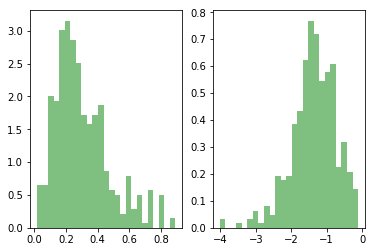

In [147]:
plt.figure(1)
plt.subplot(1,2,1)
plt.hist(scaled_testing[:,8], 25, normed=1, facecolor='green', alpha=0.5)
plt.subplot(1,2,2)
plt.hist(np.log(scaled_testing[:,8]), 25, normed=1, facecolor='green', alpha=0.5)
plt.show()

In [148]:
# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: total_earnings values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))

Note: total_earnings values were scaled by multiplying by 0.0000036968 and adding -0.115913


In [149]:
# Create new pandas DataFrame objects from the scaled data
scaled_training_df = pd.DataFrame(scaled_training, columns=training_data_df.columns.values)
scaled_testing_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns.values)

In [150]:
# Save scaled data dataframes to new CSV files
scaled_training_df.to_csv("./data/sales_data_training_scaled.csv", index=False)
scaled_testing_df.to_csv("./data/sales_data_test_scaled.csv", index=False)

In [151]:
from keras.models import Sequential
from keras.layers import *

In [152]:
training_data_df = pd.read_csv("./Data/sales_data_training_scaled.csv")

X = training_data_df.drop('total_earnings', axis=1).values #axix=1 means column and axix=0 means row
Y = training_data_df[['total_earnings']].values #.values converts the dataframe into numpy
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [153]:
#Define the model
random.seed(10)
model = Sequential()
model.add(Dense(50,input_dim=9,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear')) #we are not applying a non-linear transformation because final output is a single number represents total earning
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mae']) #mse is more sensitive (penalizes) to outliers than mean average error

In [154]:
#Train the model
model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 1s - loss: 0.0245 - mean_absolute_error: 0.1155
Epoch 2/50
 - 0s - loss: 0.0045 - mean_absolute_error: 0.0476
Epoch 3/50
 - 0s - loss: 0.0016 - mean_absolute_error: 0.0279
Epoch 4/50
 - 0s - loss: 9.7563e-04 - mean_absolute_error: 0.0227
Epoch 5/50
 - 0s - loss: 4.2738e-04 - mean_absolute_error: 0.0145
Epoch 6/50
 - 0s - loss: 2.8621e-04 - mean_absolute_error: 0.0122
Epoch 7/50
 - 0s - loss: 1.8495e-04 - mean_absolute_error: 0.0096
Epoch 8/50
 - 0s - loss: 2.4615e-04 - mean_absolute_error: 0.0116
Epoch 9/50
 - 0s - loss: 1.3091e-04 - mean_absolute_error: 0.0082
Epoch 10/50
 - 0s - loss: 9.0202e-05 - mean_absolute_error: 0.0067
Epoch 11/50
 - 0s - loss: 7.4064e-05 - mean_absolute_error: 0.0062
Epoch 12/50
 - 0s - loss: 6.3998e-05 - mean_absolute_error: 0.0057
Epoch 13/50
 - 0s - loss: 5.3582e-05 - mean_absolute_error: 0.0053
Epoch 14/50
 - 0s - loss: 6.1949e-05 - mean_absolute_error: 0.0058
Epoch 15/50
 - 0s - loss: 6.2381e-05 - mean_absolute_error: 0.0059
Epoch 16/50
 - 0

In [155]:
# Load the separate test data set
test_data_df = pd.read_csv("./data/sales_data_test_scaled.csv")

X_test = test_data_df.drop('total_earnings', axis=1).values
Y_test = test_data_df[['total_earnings']].values

In [156]:
#Test the mode
test_error_rate = model.evaluate(X_test,Y_test,verbose=0) 

In [157]:
test_error_rate =print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))
#Returns the loss value & metrics values for the model in test mode.

The mean squared error (MSE) for the test data set is: [6.6964792640646916e-05, 0.0055370009690523143]
